In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('Clean_Tweets_DT.csv')
df.head()

,label,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,socialworker,"As social workers, we will be tested throughou...",As social workers we will be tested throughout...,"['as', 'social', 'workers', 'we', 'will', 'be'...","['social', 'workers', 'tested', 'throughout', ...","['social', 'worker', 'test', 'throughout', 'ca...","['social', 'worker', 'tested', 'throughout', '..."
1,socialworker,' @eunice_lumsd'': Exc''l''t H''''. Wh'' I fo...,' eunic''umsd'' Exc''l''t H'''' Wh'' I found ...,"['''', 'eunic''umsd''', 'exc''l''t', 'h''''', ...","['''', 'eunic''umsd''', 'exc''l''t', 'h''''', ...","['''', 'eunic''umsd''', 'exc''', 'h''''', 'fou...","['''', 'eunic''umsd''', 'exc''l''t', 'h''''', ..."
2,socialworker,Flowers for Friday! #friday #doodle #sharpies ...,Flowers for Friday friday doodle sharpies expr...,"['flowers', 'for', 'friday', 'friday', 'doodle...","['flowers', 'friday', 'friday', 'doodle', 'sha...","['flower', 'friday', 'friday', 'doodl', 'sharp...","['flower', 'friday', 'friday', 'doodle', 'shar..."
3,socialworker,#Smt_Tulsi_Gowda\r\n#socialworker \r\n#PadmaSh...,SmtTulsiGowda\r\nsocialworker \r\nPadmaShriAwa...,"['smttulsigowda', 'socialworker', 'padmashriaw...","['smttulsigowda', 'socialworker', 'padmashriaw...","['smttulsigowda', 'socialwork', 'padmashriawar...","['smttulsigowda', 'socialworker', 'padmashriaw..."
4,socialworker,' @PAHospice: *Vacancy*\r\nWe're looking for a...,' PAHospice Vacancy\r\nWere looking for an exp...,"['''', 'pahospice', 'vacancy', 'were', 'lookin...","['''', 'pahospice', 'vacancy', 'looking', 'exp...","['''', 'pahospic', 'vacanc', 'look', 'experi''...","['''', 'pahospice', 'vacancy', 'looking', 'exp..."


In [3]:
df = df[['label','Tweet_lemmatized']]
df.head()

,label,Tweet_lemmatized
0,socialworker,"['social', 'worker', 'tested', 'throughout', '..."
1,socialworker,"['''', 'eunic''umsd''', 'exc''l''t', 'h''''', ..."
2,socialworker,"['flower', 'friday', 'friday', 'doodle', 'shar..."
3,socialworker,"['smttulsigowda', 'socialworker', 'padmashriaw..."
4,socialworker,"['''', 'pahospice', 'vacancy', 'looking', 'exp..."


In [4]:
final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]
final_tweets[0:5]

['social worker tested throughout career here attitude service authticity grit httpstcokfkbatok',
 ' eunicumsd exclt h found ecsdn yr ago wish studied becoming socialworker h ',
 'flower friday friday doodle sharpy expressiveastherapist socialworker certifiedtreprovider calgar httpstcopcrwekufha',
 'smttulsigowda socialworker padmashriaward karanatakatourism karanataka trib woman httpstcowvrlyeht',
 ' pahospice vacancy looking expericed socialworker great communication counsling advocacy skill suppor ']

In [5]:
df['final_tweets']=final_tweets

In [6]:
df=df.drop('Tweet_lemmatized',axis=1)
df.head()

,label,final_tweets
0,socialworker,social worker tested throughout career here at...
1,socialworker,eunicumsd exclt h found ecsdn yr ago wish stu...
2,socialworker,flower friday friday doodle sharpy expressivea...
3,socialworker,smttulsigowda socialworker padmashriaward kara...
4,socialworker,pahospice vacancy looking expericed socialwor...


Text(0, 0.5, 'Frequency')

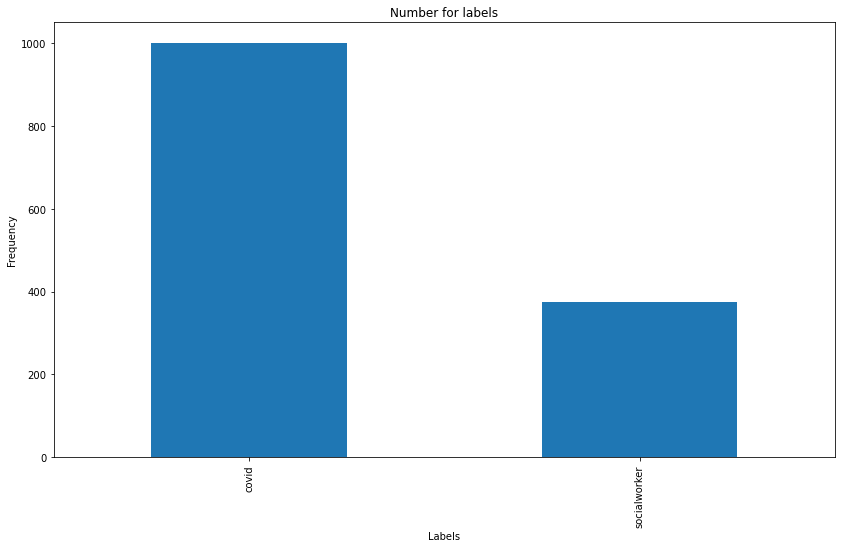

In [7]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [8]:
# Separate majority and minority classes
df_majority = df[df.label=='covid']
df_minority = df[df.label=='socialworker']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.label.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

covid           376
socialworker    376
Name: label, dtype: int64

In [9]:
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
import random as rd
MyCV_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
rd.seed(1993)
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()

dict_values([376, 376])

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

def svc_param_selection(X, y,k):
    Cs = [ .01, 1, 5, 10]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(SVC(kernel=k), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [13]:
# Getting the best cost margin
svc_param_selection(TrainDF, TrainLabels,"linear")

{'C': 1}

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       103
           1       0.88      0.99      0.93        85

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



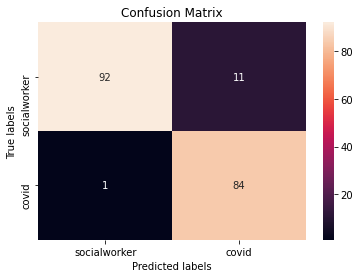

In [20]:
# Linear Kernal

SVM_Model=SVC(kernel='linear', C=1, probability=True)
SVM_Model.fit(TrainDF, TrainLabels)

Preds_SVM1 = SVM_Model.predict(TestDF)
Pred_Proba_SVM1 = SVM_Model.predict_proba(TestDF)
SVM_matrix = confusion_matrix(TestLabels, Preds_SVM1)
print(metrics.classification_report(TestLabels, Preds_SVM1))

##Visualise Confusion Matrix
labels = ['socialworker', 'covid']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM1), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()


In [16]:
# Polynomial Kernal - Finding best Cost Margin

svc_param_selection(TrainDF, TrainLabels,"poly")

{'C': 10}

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       103
           1       0.64      1.00      0.78        85

    accuracy                           0.75       188
   macro avg       0.82      0.77      0.74       188
weighted avg       0.84      0.75      0.74       188



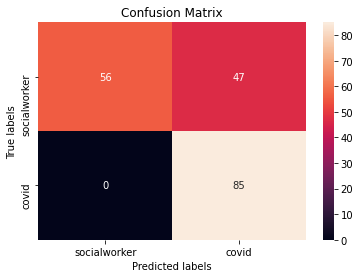

In [21]:
# Poly Kernal - C = 10

SVM_Model2=SVC(kernel='poly', C=10,probability=True)
SVM_Model2.fit(TrainDF, TrainLabels)

Preds_SVM2 = SVM_Model2.predict(TestDF)
Pred_Proba_SVM2 = SVM_Model2.predict_proba(TestDF)
SVM_matrix = confusion_matrix(TestLabels, Preds_SVM2)
print(metrics.classification_report(TestLabels, Preds_SVM2))

##Visualise Confusion Matrix
labels = ['socialworker', 'covid']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM2), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()



In [18]:
#RBF - Finding best Cost Margin

svc_param_selection(TrainDF, TrainLabels,"rbf")

{'C': 5}

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       103
           1       0.91      0.99      0.95        85

    accuracy                           0.95       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



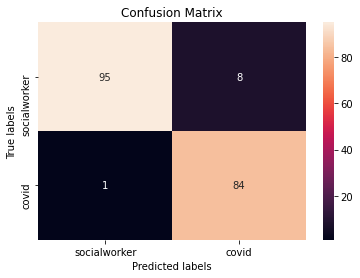

In [22]:
# RBF Kernal - C = 5

SVM_Model3=SVC(kernel='rbf', C=5,probability=True)
SVM_Model3.fit(TrainDF, TrainLabels)

Preds_SVM3 = SVM_Model3.predict(TestDF)
Pred_Proba_SVM3 = SVM_Model3.predict_proba(TestDF)
SVM_matrix3 = confusion_matrix(TestLabels, Preds_SVM3)
print(metrics.classification_report(TestLabels, Preds_SVM3))

##Visualise Confusion Matrix
labels = ['socialworker', 'covid']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()